In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:


# Load your data
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')
data.drop(['LoanID'], axis=1, inplace=True)
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:

# DecisionTree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import joblib

# Assuming you already have the data as 'data' DataFrame
# Replace 'data' with your actual DataFrame variable
df = data


# Prepare the data
X = df.drop('Default', axis=1)
y = df['Default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Prediction
y_pred = dt_model.predict(X_test)

# Evaluation
print(f"Model Accuracy: {dt_model.score(X_test, y_test)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")

joblib.dump(dt_model, 'loan_default_model.pkl')
# Save the trained model to a file
print("Model saved to loan_default_model.pkl")

Model Accuracy: 0.8009007244957901

Confusion Matrix: 
 [[39540  5630]
 [ 4538  1362]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     45170
           1       0.19      0.23      0.21      5900

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070


Model saved to loan_default_model.pkl


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_11844\4257486296.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace("PhD", 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_11844\4257486296.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_11844\4257486296.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and

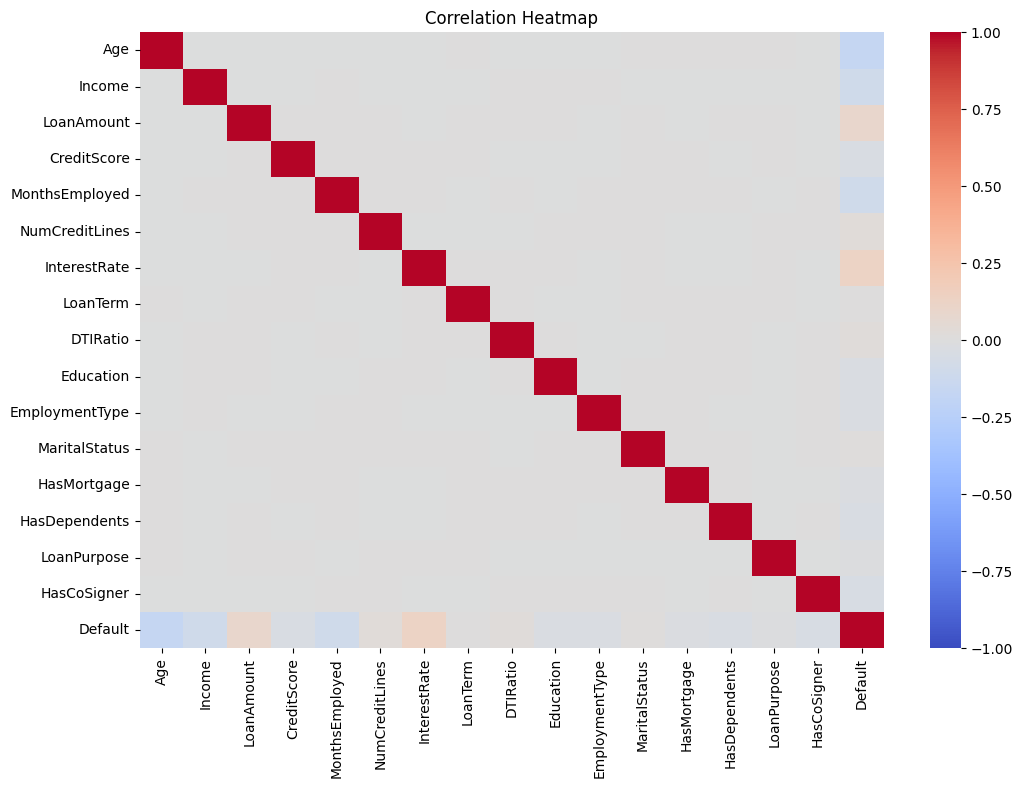

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load your data
data = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')

# Preprocess the data
data['Education'] = data['Education'].replace("High School", 1)
data['Education'] = data['Education'].replace("Bachelor's", 2)
data['Education'] = data['Education'].replace("Master's", 3)
data['Education'] = data['Education'].replace("PhD", 4)


data['EmploymentType'] = data['EmploymentType'].replace('Unemployed', 1)
data['EmploymentType'] = data['EmploymentType'].replace('Part-time', 2)
data['EmploymentType'] = data['EmploymentType'].replace('Full-time', 3)
data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)


data['MaritalStatus'] = data['MaritalStatus'].replace('Single', 1)
data['MaritalStatus'] = data['MaritalStatus'].replace('Married', 2)
data['MaritalStatus'] = data['MaritalStatus'].replace('Divorced', 3)


data['HasMortgage'] = data['HasMortgage'].replace('No', 0)
data['HasMortgage'] = data['HasMortgage'].replace('Yes', 1)


data['HasDependents'] = data['HasDependents'].replace('Yes', 1)
data['HasDependents'] = data['HasDependents'].replace('No', 0)


data['HasCoSigner'] = data['HasCoSigner'].replace('Yes', 1)
data['HasCoSigner'] = data['HasCoSigner'].replace('No', 0)


data['LoanPurpose'] = data['LoanPurpose'].replace('Auto', 1)
data['LoanPurpose'] = data['LoanPurpose'].replace('Business', 2)
data['LoanPurpose'] = data['LoanPurpose'].replace('Education', 3)
data['LoanPurpose'] = data['LoanPurpose'].replace('Home', 4)
data['LoanPurpose'] = data['LoanPurpose'].replace('Other', 5)

# Drop the 'LoanID' column
data.drop(['LoanID'], axis=1, inplace=True)

# Ensure all relevant columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# XBGoost

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

df = pd.DataFrame(data)
# df=data
# Prepare the data
X = df.drop('Default', axis=1)
y = df['Default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Prediction
y_pred = xgb_model.predict(X_test)

# Evaluation
print(f"Model Accuracy: {xgb_model.score(X_test, y_test)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}\n")

d:\Madan_MITRAz\MIT Project\Loan Default Prediction\Loan_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [17:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.8857842177403564

Confusion Matrix: 
 [[44730   440]
 [ 5393   507]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.71      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070




In [8]:
import joblib

In [9]:
joblib.dump(xgb_model, 'loan_default_xgb_model.pkl')


['loan_default_xgb_model.pkl']

In [23]:
data.to_csv('Data.csv', index=False)

In [ ]:
# Calculate correlations between all features and default probability
correlation_matrix = data.corr()
print(correlation_matrix["Default"].sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
MaritalStatus     0.007902
LoanTerm          0.000545
LoanPurpose      -0.010096
HasMortgage      -0.022856
Education        -0.028282
EmploymentType   -0.030612
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

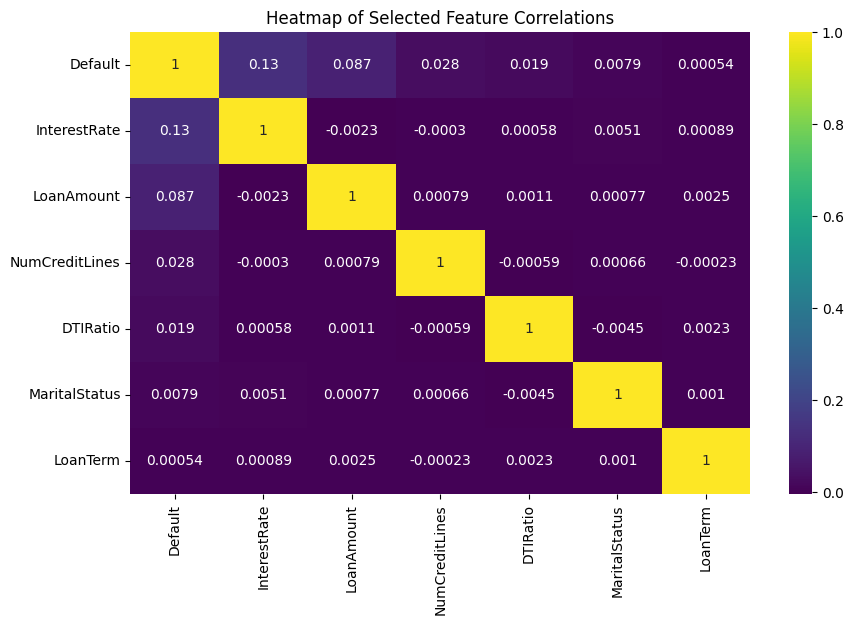

In [20]:

# Select the specified columns
selected_columns = ['Default', 'InterestRate', 'LoanAmount', 'NumCreditLines', 'DTIRatio', 'MaritalStatus', 'LoanTerm']

# Generate heatmap for the selected columns
plt.figure(figsize=(10, 6))
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='viridis')

# Save the heatmap as an image file
plt.title('Heatmap of Selected Feature Correlations')
plt.savefig('static/heatmap_selected.png')
plt.show

In [24]:
data.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.000848,-0.000255,0.002187,0.000035,0.000710,0.002264,-0.002918,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,0.000681,0.002939,-0.000637,-0.000945,-0.001570,-0.002092,-0.003524,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.002540,-0.002821,0.000771,-0.000801,0.000139,0.000057,-0.001848,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.000800,-0.000893,0.003218,0.001728,-0.003018,0.000596,-0.002755,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.001147,0.000060,0.000095,0.000210,0.001450,-0.002579,0.001045,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.001531,0.000506,0.000664,-0.001744,-0.001895,0.000340,0.002105,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.003417,-0.001309,0.005079,-0.000424,-0.000243,0.001472,-0.003991,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,-0.001421,-0.003069,0.001042,0.001775,0.002417,0.002856,-0.001166,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.001947,-0.000034,-0.004492,0.000231,0.001492,-0.003819,0.000373,0.019236
Education,-0.000848,0.000681,0.002540,-0.000800,-0.001147,0.001531,0.003417,-0.001421,0.001947,1.000000,-0.000216,0.001540,0.001965,0.000056,-0.002038,0.001692,-0.028282


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_20652\1251661717.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace("PhD", 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_20652\1251661717.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_20652\1251661717.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and

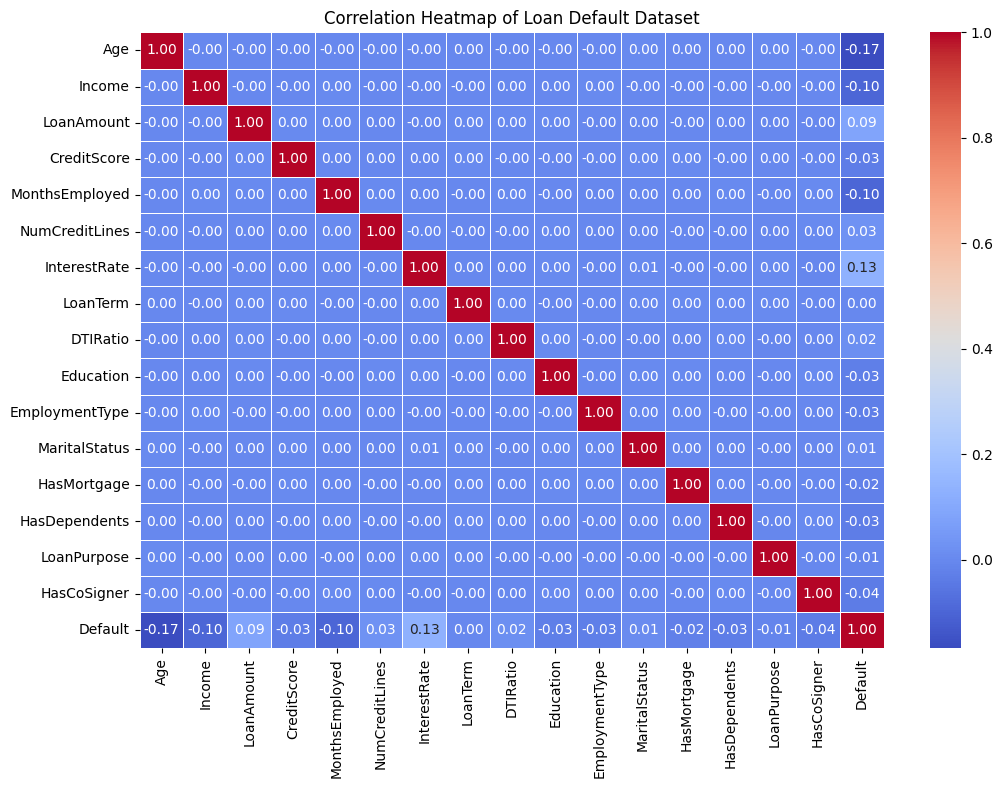

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')

# Drop 'LoanID' column if it's not needed
data.drop(['LoanID'], axis=1, inplace=True)

# Preprocess the data
data['Education'] = data['Education'].replace("High School", 1)
data['Education'] = data['Education'].replace("Bachelor's", 2)
data['Education'] = data['Education'].replace("Master's", 3)
data['Education'] = data['Education'].replace("PhD", 4)
data['EmploymentType'] = data['EmploymentType'].replace('Unemployed', 1)
data['EmploymentType'] = data['EmploymentType'].replace('Part-time', 2)
data['EmploymentType'] = data['EmploymentType'].replace('Full-time', 3)
data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
data['MaritalStatus'] = data['MaritalStatus'].replace('Single', 1)
data['MaritalStatus'] = data['MaritalStatus'].replace('Married', 2)
data['MaritalStatus'] = data['MaritalStatus'].replace('Divorced', 3)
data['HasMortgage'] = data['HasMortgage'].replace('No', 0)
data['HasMortgage'] = data['HasMortgage'].replace('Yes', 1)
data['HasDependents'] = data['HasDependents'].replace('Yes', 1)
data['HasDependents'] = data['HasDependents'].replace('No', 0)
data['HasCoSigner'] = data['HasCoSigner'].replace('Yes', 1)
data['HasCoSigner'] = data['HasCoSigner'].replace('No', 0)
data['LoanPurpose'] = data['LoanPurpose'].replace('Auto', 1)
data['LoanPurpose'] = data['LoanPurpose'].replace('Business', 2)
data['LoanPurpose'] = data['LoanPurpose'].replace('Education', 3)
data['LoanPurpose'] = data['LoanPurpose'].replace('Home', 4)
data['LoanPurpose'] = data['LoanPurpose'].replace('Other', 5)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Heatmap of Loan Default Dataset')
plt.show()


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_20652\1094961786.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace("PhD", 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_20652\1094961786.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_20652\1094961786.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and

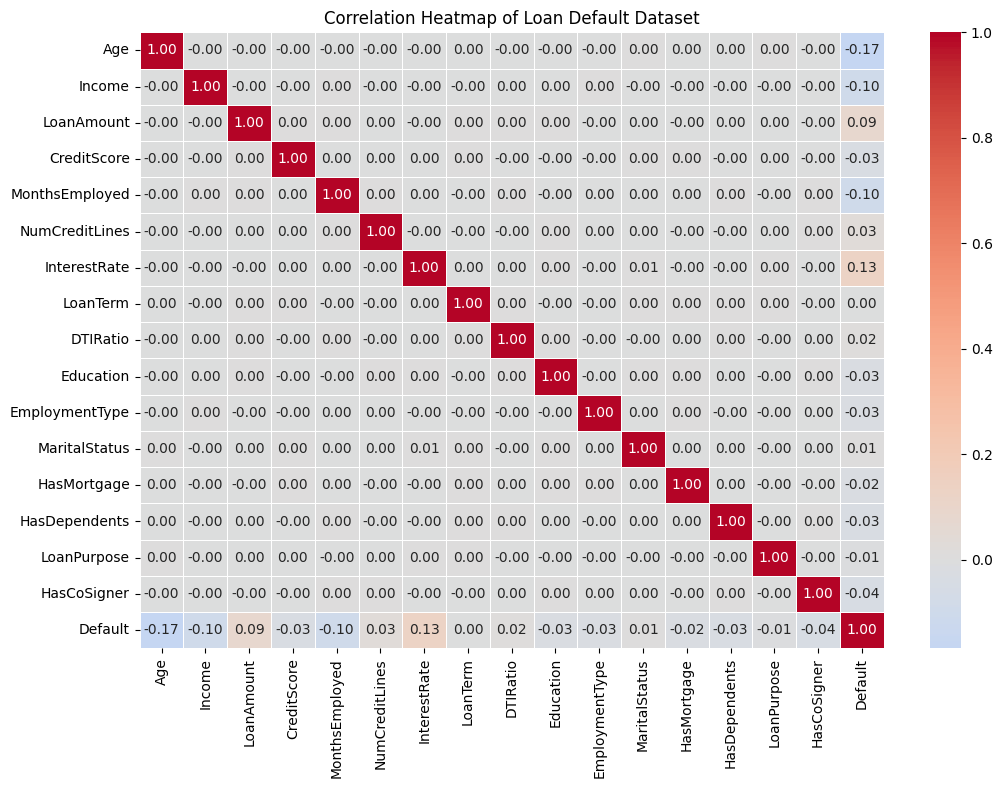

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')

# Drop 'LoanID' column if it's not needed
data.drop(['LoanID'], axis=1, inplace=True)

# Preprocess the data
data['Education'] = data['Education'].replace("High School", 1)
data['Education'] = data['Education'].replace("Bachelor's", 2)
data['Education'] = data['Education'].replace("Master's", 3)
data['Education'] = data['Education'].replace("PhD", 4)
data['EmploymentType'] = data['EmploymentType'].replace('Unemployed', 1)
data['EmploymentType'] = data['EmploymentType'].replace('Part-time', 2)
data['EmploymentType'] = data['EmploymentType'].replace('Full-time', 3)
data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
data['MaritalStatus'] = data['MaritalStatus'].replace('Single', 1)
data['MaritalStatus'] = data['MaritalStatus'].replace('Married', 2)
data['MaritalStatus'] = data['MaritalStatus'].replace('Divorced', 3)
data['HasMortgage'] = data['HasMortgage'].replace('No', 0)
data['HasMortgage'] = data['HasMortgage'].replace('Yes', 1)
data['HasDependents'] = data['HasDependents'].replace('Yes', 1)
data['HasDependents'] = data['HasDependents'].replace('No', 0)
data['HasCoSigner'] = data['HasCoSigner'].replace('Yes', 1)
data['HasCoSigner'] = data['HasCoSigner'].replace('No', 0)
data['LoanPurpose'] = data['LoanPurpose'].replace('Auto', 1)
data['LoanPurpose'] = data['LoanPurpose'].replace('Business', 2)
data['LoanPurpose'] = data['LoanPurpose'].replace('Education', 3)
data['LoanPurpose'] = data['LoanPurpose'].replace('Home', 4)
data['LoanPurpose'] = data['LoanPurpose'].replace('Other', 5)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap with custom color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)

# Show the heatmap
plt.title('Correlation Heatmap of Loan Default Dataset')
plt.show()


In [ ]:
# credit history length


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')
df.drop(['LoanID'], axis=1, inplace=True)
# Clean column names (strip whitespace)
df.columns = df.columns.str.strip()

# Confirm columns exist
assert all(col in df.columns for col in ['Education', 'EmploymentType']), "Columns missing!"

# Convert 'MonthsEmployed' to credit history in years
df["CreditHistoryYears"] = df["MonthsEmployed"] / 12

# Bin into groups
df["CreditHistoryGroup"] = pd.cut(
    df["CreditHistoryYears"],
    bins=[0, 2, 5, 100],
    labels=["<2y", "2-5y", ">5y"]
)

# One-hot encode categorical variables
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df = df.drop(['LoanID'], axis=1)  # Drop LoanID if it's not needed

In [23]:
df.columns.to_list()

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner',
 'Default']

In [49]:
# Convert months employed to years
df["CreditHistoryYears"] = df["MonthsEmployed"] / 12

# Bin into groups: <2 years, 2-5 years, >5 years
df["CreditHistoryGroup"] = pd.cut(
    df["CreditHistoryYears"],
    bins=[0, 2, 5, 100],
    labels=["<2y", "2-5y", ">5y"]
)


In [50]:
DTI_Ratio = df['DTIRatio']

C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\994495874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby("CreditHistoryGroup")["Default"].mean().reset_index()
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\994495874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CreditHistoryGroup", y="Default", data=default_rates, palette="viridis")


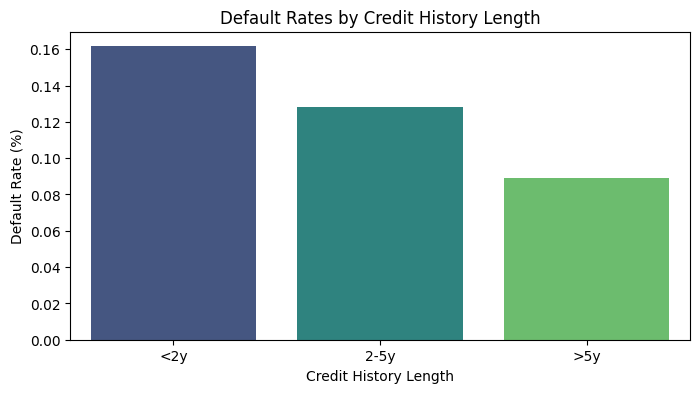

In [51]:
# Calculate default rates per group
default_rates = df.groupby("CreditHistoryGroup")["Default"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="CreditHistoryGroup", y="Default", data=default_rates, palette="viridis")
plt.title("Default Rates by Credit History Length")
plt.ylabel("Default Rate (%)")
plt.xlabel("Credit History Length")
plt.show()

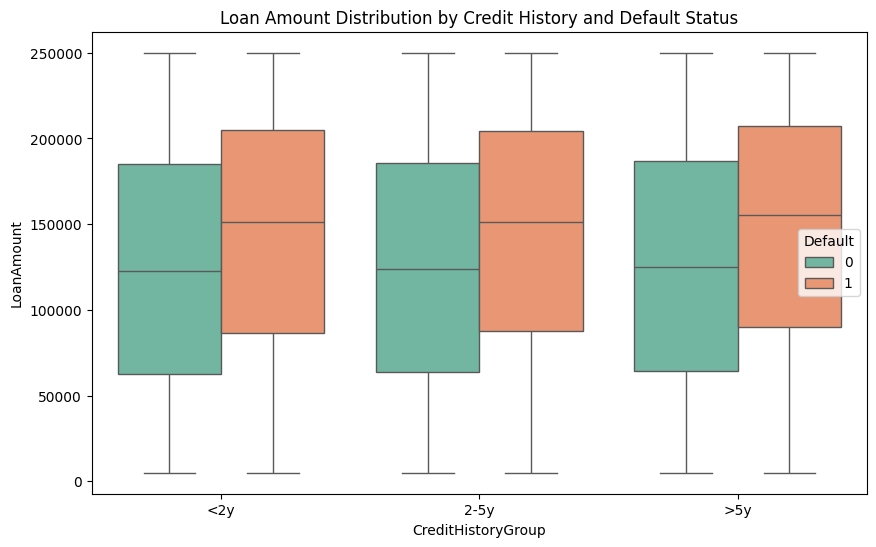

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CreditHistoryGroup", y="LoanAmount", data=df, hue="Default", palette="Set2")
plt.title("Loan Amount Distribution by Credit History and Default Status")
plt.show()

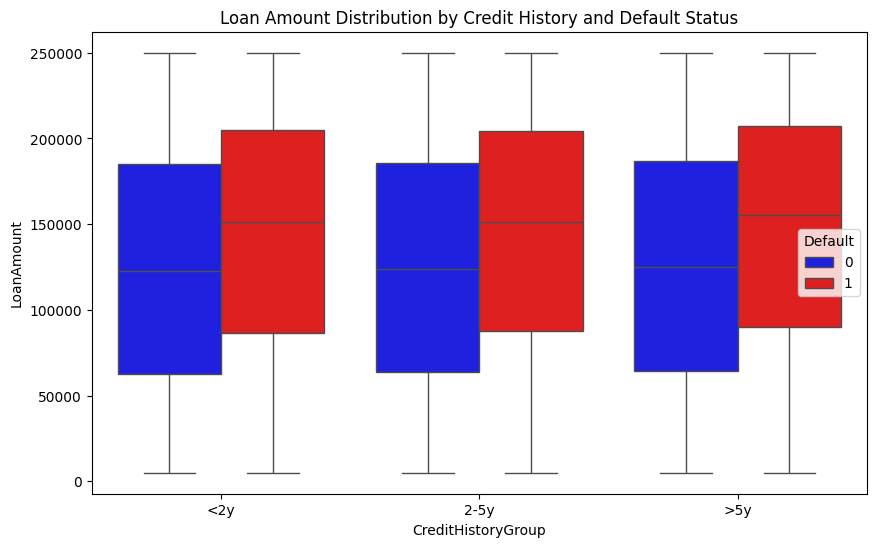

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# sns.boxplot(
#     x="CreditHistoryGroup", 
#     y="LoanAmount", 
#     hue="Default", 
#     data=df, 
#     palette="Set2",
# )
sns.boxplot(x="CreditHistoryGroup", y="LoanAmount", data=df, hue="Default",     palette={0: "blue", 1: "red"})

plt.title("Loan Amount Distribution by Credit History and Default Status")
plt.show()

d:\Madan_MITRAz\MIT Project\Loan Default Prediction\Loan_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


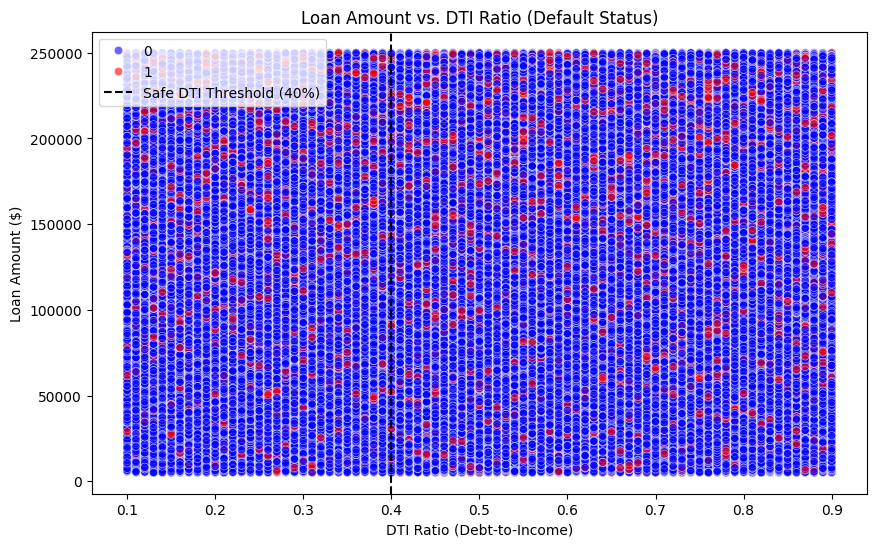

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="DTIRatio", 
    y="LoanAmount", 
    hue="Default", 
    data=df, 
    palette={0: "blue", 1: "red"},
    alpha=0.6
)
plt.title("Loan Amount vs. DTI Ratio (Default Status)")
plt.xlabel("DTI Ratio (Debt-to-Income)")
plt.ylabel("Loan Amount ($)")
plt.axvline(x=0.4, color="black", linestyle="--", label="Safe DTI Threshold (40%)")  # Common lender threshold
plt.legend()
plt.show()

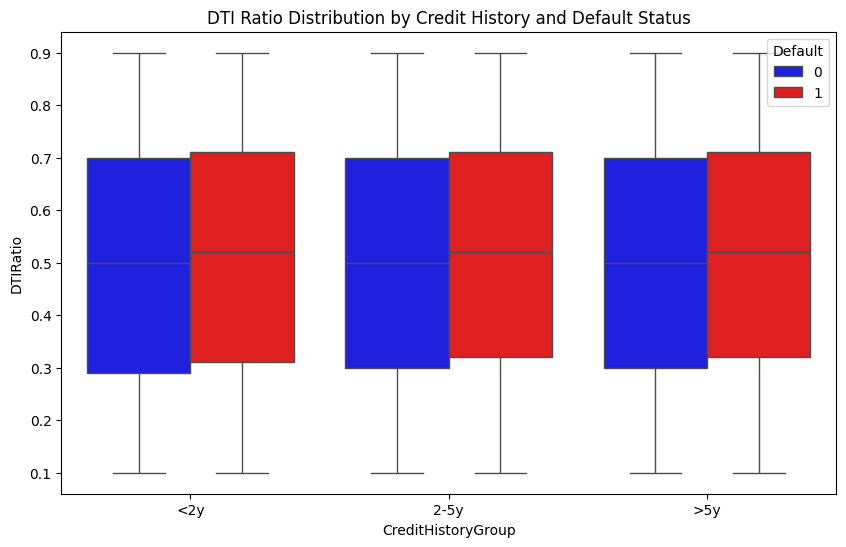

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="CreditHistoryGroup", 
    y="DTIRatio", 
    hue="Default", 
    data=df, 
    palette={0: "blue", 1: "red"}
)
plt.title("DTI Ratio Distribution by Credit History and Default Status")
plt.show()

C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\1002861830.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="RiskCategory", y="Default", data=df, ci=None)


<Axes: xlabel='RiskCategory', ylabel='Default'>

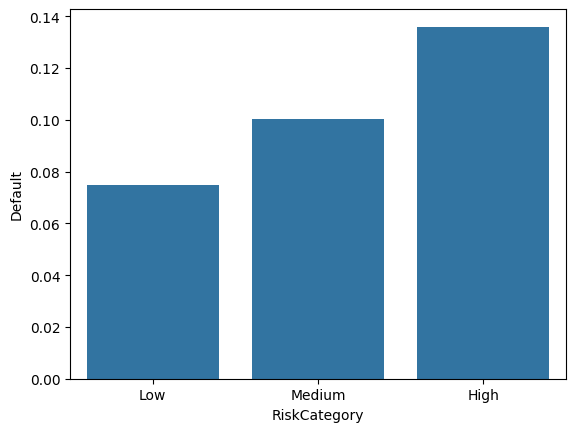

In [57]:
df["RiskScore"] = df["LoanAmount"] * df["DTIRatio"]  # Higher = Riskier
df["RiskCategory"] = pd.cut(
    df["RiskScore"],
    bins=[0, 10000, 50000, float("inf")],
    labels=["Low", "Medium", "High"]
)

# Plot risk categories vs. default rates
sns.barplot(x="RiskCategory", y="Default", data=df, ci=None)

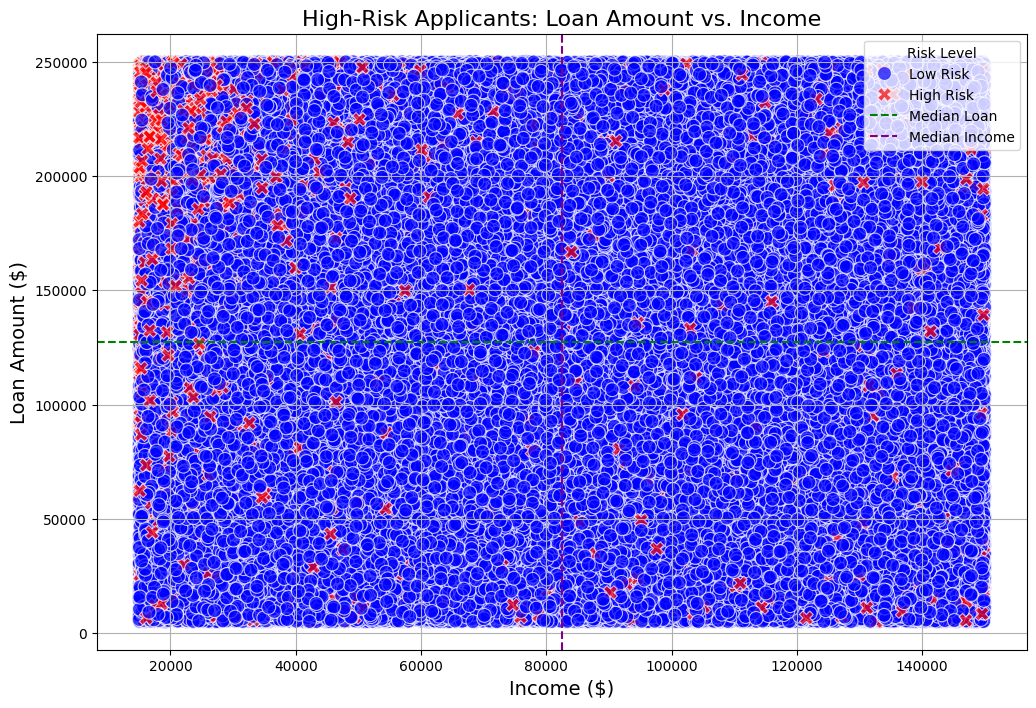

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Income",
    y="LoanAmount",
    hue="IsAnomaly",
    style="IsAnomaly",  # Optional: Different markers for anomalies
    data=df,
    palette={"High Risk": "red", "Low Risk": "blue"},
    alpha=0.7,
    s=100  # Marker size
)
plt.title("High-Risk Applicants: Loan Amount vs. Income", fontsize=16)
plt.xlabel("Income ($)", fontsize=14)
plt.ylabel("Loan Amount ($)", fontsize=14)
plt.axhline(y=df["LoanAmount"].median(), color="green", linestyle="--", label="Median Loan")
plt.axvline(x=df["Income"].median(), color="purple", linestyle="--", label="Median Income")
plt.legend(title="Risk Level", loc="upper right")
plt.grid(True)
plt.show()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')

# Clean column names (remove whitespace)
df.columns = df.columns.str.strip()

# Feature engineering: Convert months to years and bin into groups
df["CreditHistoryYears"] = df["MonthsEmployed"] / 12
df["CreditHistoryGroup"] = pd.cut(
    df["CreditHistoryYears"],
    bins=[0, 2, 5, 100],
    labels=["<2y", "2-5y", ">5y"]
)

In [60]:
# Calculate default rates
default_rates = df.groupby("CreditHistoryGroup")["Default"].mean() * 100
print(default_rates)

CreditHistoryGroup
<2y     16.157128
2-5y    12.832769
>5y      8.916087
Name: Default, dtype: float64


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\3648073218.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby("CreditHistoryGroup")["Default"].mean() * 100


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\2686852278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


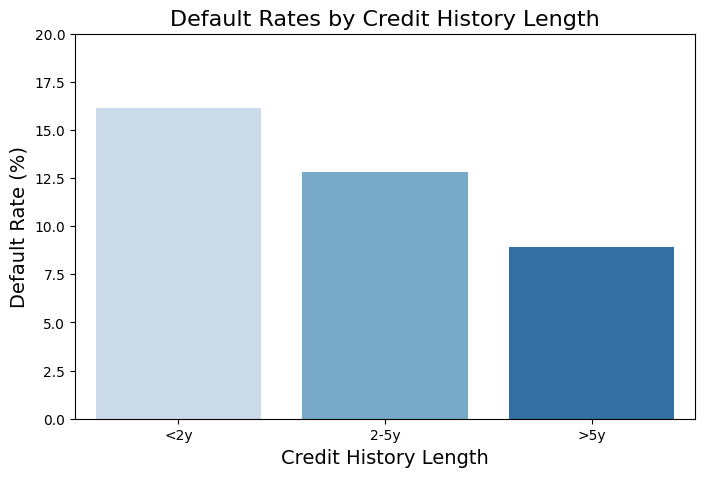

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=default_rates.index,
    y=default_rates.values,
    palette="Blues"
)
plt.title("Default Rates by Credit History Length", fontsize=16)
plt.xlabel("Credit History Length", fontsize=14)
plt.ylabel("Default Rate (%)", fontsize=14)
plt.ylim(0, 20)  # Adjust y-axis if needed
plt.show()

In [62]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["CreditHistoryGroup"], df["Default"])

# Run Chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\2606335840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="Blues")


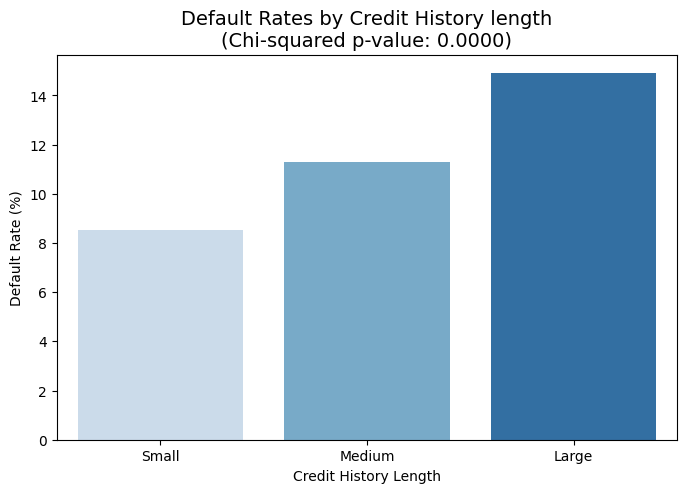

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(x=default_rates.index, y=default_rates.values, palette="Blues")
plt.title(
    f"Default Rates by Credit History length\n(Chi-squared p-value: {p_value:.4f})", 
    fontsize=14
)
plt.xlabel("Credit History Length")
plt.ylabel("Default Rate (%)")
plt.show()

In [65]:
import pandas as pd

# Bin loan amounts into quantiles (adjust bins as needed)
df["LoanAmountGroup"] = pd.qcut(df["LoanAmount"], q=[0, 0.33, 0.66, 1], labels=["Small", "Medium", "Large"])

# Calculate default rates per group
default_rates = df.groupby("LoanAmountGroup")["Default"].mean() * 100
print(default_rates)

LoanAmountGroup
Small      8.515991
Medium    11.310880
Large     14.911654
Name: Default, dtype: float64


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\3749972081.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby("LoanAmountGroup")["Default"].mean() * 100


In [66]:
correlation = df["LoanAmount"].corr(df["Default"], method="spearman")  # Spearman for monotonic relationships
print(f"Correlation between Loan Amount and Default: {correlation:.3f}")

Correlation between Loan Amount and Default: 0.087


C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\1684197916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


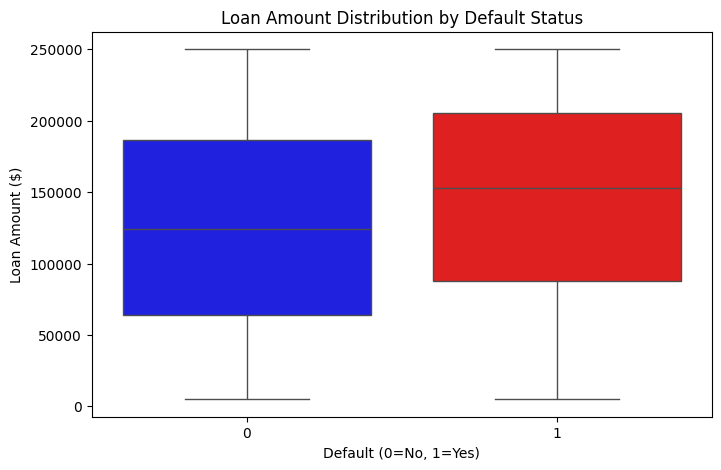

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Default", 
    y="LoanAmount", 
    data=df, 
    palette={"0": "blue", "1": "red"}  # Use strings as keys
)
plt.title("Loan Amount Distribution by Default Status")
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Loan Amount ($)")
plt.show()

C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\956501496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


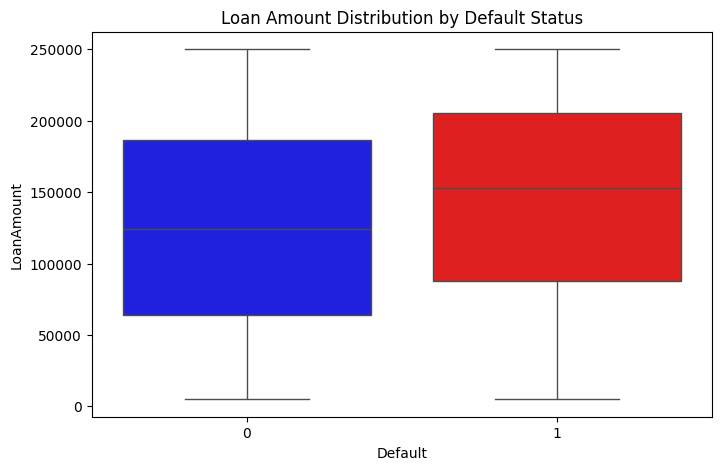

In [69]:
df["Default"] = df["Default"].astype(str)  # Convert to string dtype
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Default", 
    y="LoanAmount", 
    data=df, 
    palette={"0": "blue", "1": "red"}
)
plt.title("Loan Amount Distribution by Default Status")
plt.show()

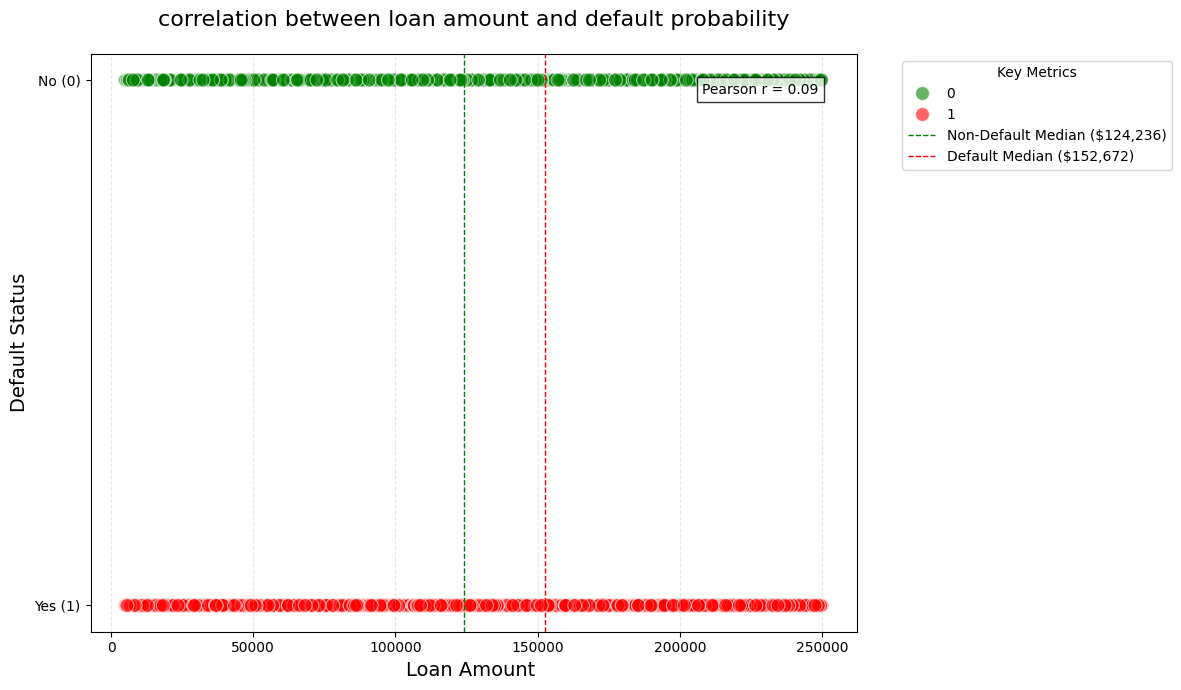

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Default' to strings for color mapping
df["Default"] = df["Default"].astype(str)

# Create scatter plot
plt.figure(figsize=(12, 7))
ax = sns.scatterplot(
    x="LoanAmount", 
    y="Default", 
    hue="Default", 
    data=df, 
    palette={"0": "green", "1": "red"},
    alpha=0.6,
    s=100  # Point size
)

# Add median lines and annotations
median_0 = df[df["Default"] == "0"]["LoanAmount"].median()
median_1 = df[df["Default"] == "1"]["LoanAmount"].median()

plt.axvline(x=median_0, color='green', linestyle='--', linewidth=1, label=f'Non-Default Median (${median_0:,.0f})')
plt.axvline(x=median_1, color='red', linestyle='--', linewidth=1, label=f'Default Median (${median_1:,.0f})')

# Customize plot
plt.title("correlation between loan amount and default probability", fontsize=16, pad=20)
plt.xlabel("Loan Amount ", fontsize=14)
plt.ylabel("Default Status", fontsize=14)
plt.yticks(ticks=[0, 1], labels=["No (0)", "Yes (1)"])
plt.legend(title="Key Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="x", linestyle="--", alpha=0.3)

# Add correlation coefficient
corr = df["LoanAmount"].corr(df["Default"].astype(float))
plt.text(0.95, 0.95, f"Pearson r = {corr:.2f}", 
         transform=ax.transAxes, ha="right", va="top",
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



AttributeError: 'str' object has no attribute 'astype'

In [73]:
data = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default old.csv')
data.drop(['LoanID'], axis=1, inplace=True)

In [76]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


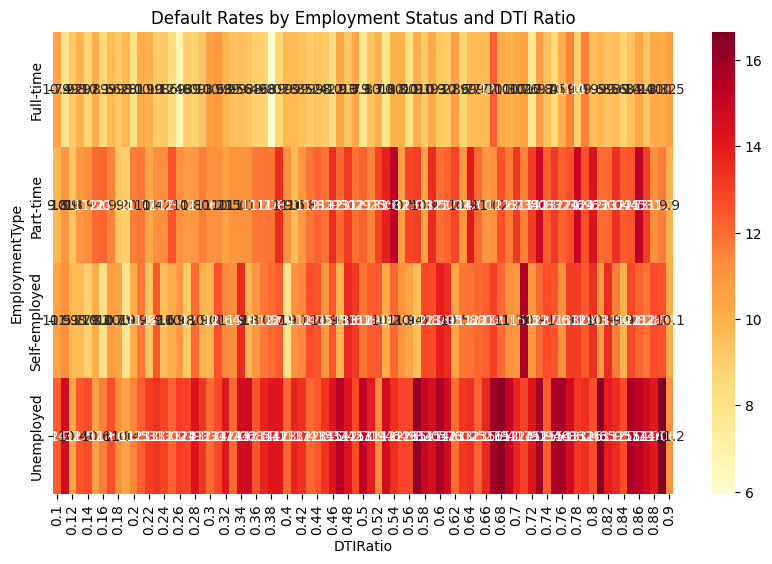

In [79]:
pivot_table = data.pivot_table(values="Default", index="EmploymentType", columns="DTIRatio", aggfunc="mean") * 100
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Default Rates by Employment Status and DTI Ratio")
plt.show()

C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_31360\287345367.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(


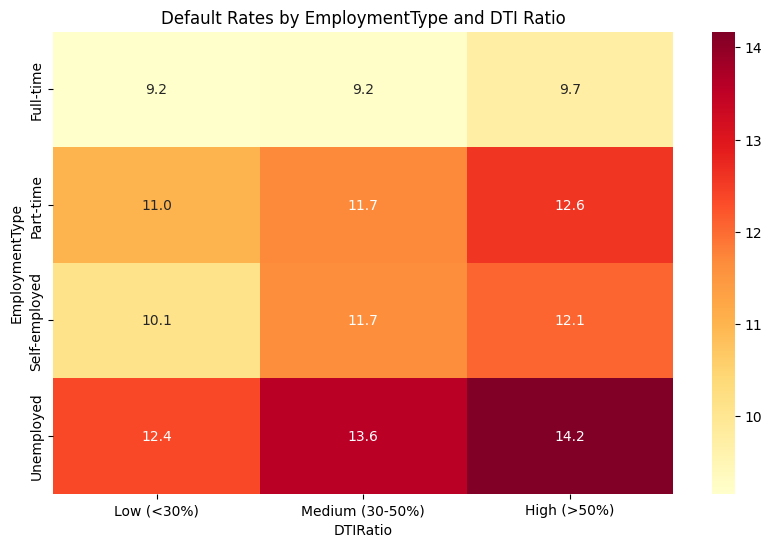

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Clean column names
data.columns = data.columns.str.strip()

# 2. Verify if 'EmploymentType' exists (if not, use a fallback column)
if "EmploymentType" not in data.columns:
    print("Warning: 'EmploymentType' column not found. Using 'Education' as fallback.")
    pivot_index = "Education"
else:
    pivot_index = "EmploymentType"

# 3. Create DTI groups (if not already done)
data["DTIRatio"] = pd.cut(
    data["DTIRatio"], 
    bins=[0, 0.3, 0.5, 1.0], 
    labels=["Low (<30%)", "Medium (30-50%)", "High (>50%)"]
)

# 4. Generate pivot table
pivot_table = data.pivot_table(
    values="Default", 
    index=pivot_index, 
    columns="DTIRatio", 
    aggfunc="mean"
) * 100

# 5. Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title(f"Default Rates by {pivot_index} and DTI Ratio")
plt.show()